In [1]:
! pip install gensim

    100% |████████████████████████████████| 24.2MB 2.2MB/s eta 0:00:01
    100% |████████████████████████████████| 51kB 31.4MB/s ta 0:00:01
  Running setup.py bdist_wheel for smart-open ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/6a/d2/01/eba912a84fcac622bd25682b0d82933702f5324559e9e62a69
  Running setup.py bdist_wheel for bz2file ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file
fastai 1.0.50.post1 requires nvidia-ml-py3, which is not installed.
thinc 6.12.1 has requirement msgpack<0.6.0,>=0.5.6, but you'll have msgpack 0.6.0 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# From: https://stackoverflow.com/questions/38511444/python-download-files-from-google-drive-using-url
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [3]:
import gensim
from gensim.models import word2vec
import os
import traceback
from visualize_wordvecs import make_word_vec_plot
home = os.path.expanduser("~")

model_path = home + '/data/workshop_data/GoogleNews-vectors-negative300.bin.gz'

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


In [4]:
file_id = '0B7XkCwpI5KDYNlNUTTlSS21pQmM'
try:
    import boto3
    s3 = boto3.resource('s3')
    s3.Bucket('workshopqcondata').download_file('data/GoogleNews-vectors-negative300.bin.gz', model_path)
except:
    if not os.path.exists(model_path):
        download_file_from_google_drive(file_id, model_path)

In [5]:
model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431607246399)]

In [9]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431607246399)]

In [6]:
words = ['woman', 'man', 'queen', 'king', 'water']
vecs = [model[word] for word in words]

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


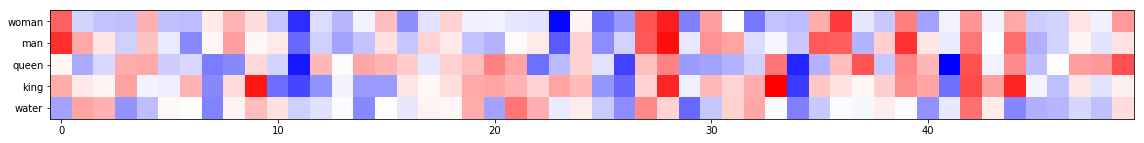

In [7]:
fig = make_word_vec_plot(words, [vec[:50] for vec in vecs])
fig.show()

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


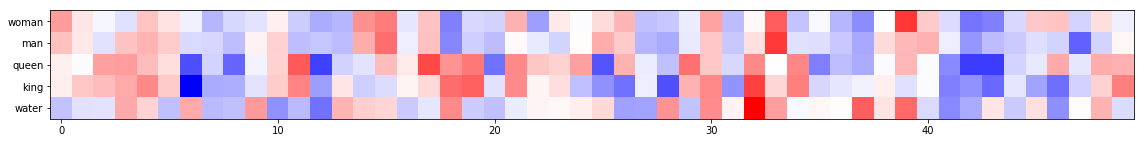

In [8]:
fig = make_word_vec_plot(words, [vec[250:] for vec in vecs])
fig.show()